## Texture Prediction
## STEP 1 image preparation



-----
##### Author: NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

In [1]:
import glob
import os
import PIL
import PIL.Image
import cv2

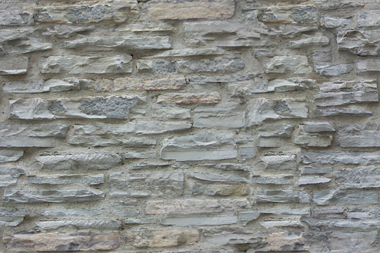

In [2]:
THE_PATH = "dataRaw/wall/" # the path
index = 4
path = glob.glob(THE_PATH + "*.*") # get all path for image
PIL.Image.open(str(path[index])) # print a sample

In [3]:
path # print the path

['dataRaw/wall\\1 (1).jpg',
 'dataRaw/wall\\1 (10).jpg',
 'dataRaw/wall\\1 (11).jpg',
 'dataRaw/wall\\1 (12).jpg',
 'dataRaw/wall\\1 (13).jpg',
 'dataRaw/wall\\1 (14).jpg',
 'dataRaw/wall\\1 (15).jpg',
 'dataRaw/wall\\1 (16).jpg',
 'dataRaw/wall\\1 (17).jpg',
 'dataRaw/wall\\1 (18).jpg',
 'dataRaw/wall\\1 (19).jpg',
 'dataRaw/wall\\1 (20).jpg',
 'dataRaw/wall\\1 (21).jpg',
 'dataRaw/wall\\1 (22).jpg',
 'dataRaw/wall\\1 (23).jpg',
 'dataRaw/wall\\1 (24).jpg',
 'dataRaw/wall\\1 (25).jpg',
 'dataRaw/wall\\1 (26).jpg',
 'dataRaw/wall\\1 (27).jpg',
 'dataRaw/wall\\1 (28).jpg',
 'dataRaw/wall\\1 (29).jpg',
 'dataRaw/wall\\1 (30).jpg',
 'dataRaw/wall\\1 (31).jpg',
 'dataRaw/wall\\1 (32).jpg',
 'dataRaw/wall\\1 (33).jpg',
 'dataRaw/wall\\1 (34).jpg',
 'dataRaw/wall\\1 (35).jpg',
 'dataRaw/wall\\1 (36).jpg',
 'dataRaw/wall\\1 (37).jpg',
 'dataRaw/wall\\1 (38).jpg',
 'dataRaw/wall\\1 (39).jpg',
 'dataRaw/wall\\1 (4).jpg',
 'dataRaw/wall\\1 (40).jpg',
 'dataRaw/wall\\1 (41).jpg',
 'dataRaw/wall\\

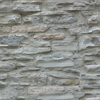

In [4]:
PATH_SAVED = 'dataRaw'
DIM = (100, 100) # new dimension of the images for traning

index = index 
im = PIL.Image.open(path[index]) # load the image by the index
 
width, height = im.size
size = 200

# setting the position for cropped image
left = width * 0.5 - size * 0.5
top = height * 0.5 - size * 0.5
right = width * 0.5 + size * 0.5
bottom = height * 0.5 + size * 0.5

# Cropping image of above dimension (it will not change original image)
im1 = im.crop((left, top, right, bottom))
im1 = im1.resize(DIM) # resize the cropped image
# im1.save(PATH_SAVED + "/img.png")
im1

In [5]:
# make the code above cell a function 
def imageProcess(path, size = 450, dim = 450):
    im = PIL.Image.open(path)
    width, height = im.size
    
    left = width * 0.5 - size * 0.5
    top = height * 0.5 - size * 0.5
    right = width * 0.5 + size * 0.5
    bottom = height * 0.5 + size * 0.5

    im1 = im.crop((left, top, right, bottom))
    im1 = im1.resize(dim)
    return im1

In [6]:
THE_PATH = "dataRaw/"
PATH_SAVED = "dataProcessed/"
allPath = [x[0] for x in os.walk(THE_PATH)]

SIZE = 200
DIM = (100, 100)

for path in allPath:
    if len(path) > 0:
        className = path.split('/')[1]
        files = glob.glob(path + "/*.*")
        if len(files) > 0:
            print(len(files))
            for j in range(len(files)):
                # className = path.split('/')[1]
                print(files[j])
                img = imageProcess(files[j], SIZE, DIM)
                # img.show()
                img.save(PATH_SAVED + str(className) + "_" + str(j) + ".jpg")
                # print(className)
                # break
        # break

58
dataRaw/brick\1 (10).jpg
dataRaw/brick\1 (11).jpg
dataRaw/brick\1 (12).jpg
dataRaw/brick\1 (13).jpg
dataRaw/brick\1 (14).jpg
dataRaw/brick\1 (15).jpg
dataRaw/brick\1 (16).jpg
dataRaw/brick\1 (17).jpg
dataRaw/brick\1 (18).jpg
dataRaw/brick\1 (19).jpg
dataRaw/brick\1 (2).jpg
dataRaw/brick\1 (20).jpg
dataRaw/brick\1 (21).jpg
dataRaw/brick\1 (22).jpg
dataRaw/brick\1 (23).jpg
dataRaw/brick\1 (24).jpg
dataRaw/brick\1 (25).jpg
dataRaw/brick\1 (26).jpg
dataRaw/brick\1 (27).jpg
dataRaw/brick\1 (28).jpg
dataRaw/brick\1 (29).jpg
dataRaw/brick\1 (3).jpg
dataRaw/brick\1 (30).jpg
dataRaw/brick\1 (31).jpg
dataRaw/brick\1 (32).jpg
dataRaw/brick\1 (33).jpg
dataRaw/brick\1 (34).jpg
dataRaw/brick\1 (35).jpg
dataRaw/brick\1 (36).jpg
dataRaw/brick\1 (37).jpg
dataRaw/brick\1 (38).jpg
dataRaw/brick\1 (39).jpg
dataRaw/brick\1 (4).jpg
dataRaw/brick\1 (40).jpg
dataRaw/brick\1 (41).jpg
dataRaw/brick\1 (42).jpg
dataRaw/brick\1 (43).jpg
dataRaw/brick\1 (44).jpg
dataRaw/brick\1 (45).jpg
dataRaw/brick\1 (46).jpg


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

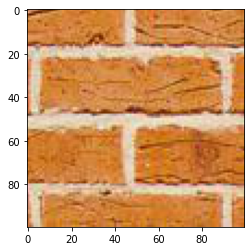

In [36]:
PATH_SAVED = "dataProcessed"
files = glob.glob(PATH_SAVED + "/*.*")

im = cv2.imread (files[3], cv2.IMREAD_COLOR)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# img = tf.keras.preprocessing.image.array_to_img(im)

array = tf.keras.preprocessing.image.img_to_array(im)
plt.imshow(array/255)

In [8]:
PATH_SAVED = "dataProcessed"
files = glob.glob(PATH_SAVED + "/*.*")
classList = []

for f in files:
    type = f.split('\\')[-1].split('_')[0]
    if type not in classList:
        classList.append(type)
print(classList)

np.random.shuffle(files)

data = []
target = []
for f in files:
    type = f.split('\\')[-1].split('_')[0]
    if (type in classList):
        id = classList.index(type)
        target.append(id)

        im = cv2.imread (f, cv2.IMREAD_COLOR)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        array = tf.keras.preprocessing.image.img_to_array(im)
        # array.resize(DIM[0]))
        data.append(array)
        # plt.imshow(array/255)
        # break
    # print(data[0])

dataArray = np.array(data)
# dataArray = tf.expand_dims(dataArray, axis=-1)

['brick', 'concrete', 'floor', 'grass', 'roop', 'sidewalk', 'wall']


In [9]:
dataArray.shape

(427, 100, 100, 3)

In [10]:
# dataArray = tf.random.shuffle(dataArray, seed=0, name=None )
# target = tf.random.shuffle(target, seed=0, name=None )

In [11]:
# target.numpy()

roop


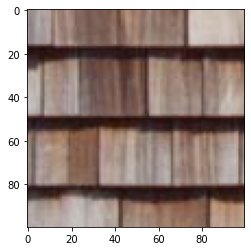

In [12]:
index = 6
print(classList[target[index]])
plt.imshow(dataArray[index]/255)



In [13]:
print(len(target))
target

427


[2,
 6,
 6,
 2,
 0,
 6,
 4,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 6,
 6,
 1,
 1,
 2,
 4,
 1,
 2,
 6,
 2,
 0,
 4,
 4,
 5,
 2,
 6,
 2,
 0,
 2,
 4,
 4,
 0,
 5,
 4,
 2,
 2,
 5,
 4,
 1,
 4,
 5,
 3,
 1,
 0,
 0,
 5,
 6,
 2,
 6,
 0,
 2,
 0,
 2,
 4,
 6,
 0,
 2,
 1,
 6,
 2,
 3,
 5,
 5,
 0,
 2,
 2,
 6,
 6,
 6,
 2,
 2,
 0,
 6,
 6,
 4,
 4,
 2,
 2,
 6,
 2,
 2,
 3,
 3,
 2,
 6,
 2,
 5,
 6,
 5,
 5,
 6,
 6,
 2,
 5,
 2,
 2,
 4,
 6,
 6,
 1,
 6,
 6,
 5,
 4,
 4,
 2,
 1,
 4,
 0,
 1,
 0,
 4,
 6,
 2,
 2,
 5,
 2,
 0,
 6,
 0,
 1,
 0,
 0,
 6,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 6,
 4,
 4,
 3,
 6,
 2,
 0,
 2,
 4,
 0,
 2,
 2,
 2,
 3,
 1,
 1,
 5,
 2,
 2,
 6,
 2,
 0,
 2,
 1,
 1,
 6,
 2,
 0,
 2,
 0,
 2,
 2,
 6,
 5,
 0,
 6,
 0,
 3,
 4,
 1,
 6,
 2,
 2,
 6,
 4,
 6,
 2,
 2,
 2,
 2,
 5,
 3,
 4,
 2,
 2,
 2,
 1,
 6,
 6,
 3,
 6,
 1,
 2,
 5,
 6,
 2,
 3,
 2,
 2,
 6,
 6,
 6,
 0,
 5,
 2,
 6,
 4,
 3,
 5,
 0,
 2,
 1,
 5,
 4,
 2,
 2,
 2,
 4,
 0,
 0,
 1,
 6,
 2,
 2,
 5,
 6,
 2,
 1,
 6,
 6,
 2,
 0,
 1,
 4,
 1,
 2,
 0,
 5,
 3,
 3,
 0,
 6,
 2,
